In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
csv_url = 'data/energyreporter_historized/energyreporter_canton_historized.csv'
dataset = pd.read_csv(csv_url)

In [3]:
dataset

,canton,energyreporter_date,electric_car_share,electric_car_count,electric_car_share_last_change,electric_car_charging_spot_count,electric_cars_per_charging_spot,electric_car_charging_spot_last_change,solar_potential_usage,solar_power_installed_kwp,...,elec_consumption_date_until,renelec_production_mwh_per_year_per_capita,renelec_production_mwh_per_year,renelec_production_water_mwh_per_year,renelec_production_solar_mwh_per_year,renelec_production_wind_mwh_per_year,renelec_production_biomass_mwh_per_year,renelec_production_waste_mwh_per_year,renelec_production_date_from,renelec_production_date_until
0,AG,2021-03-31,0.008778,3818,2021-02-28,NaN,NaN,NaN,0.036270,172213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AG,2021-04-30,0.011150,4859,2021-03-31,NaN,NaN,NaN,0.036270,172213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AG,2021-05-31,0.011450,5007,2021-04-30,NaN,NaN,NaN,0.040142,190597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AG,2021-06-30,0.011895,5217,2021-05-31,NaN,NaN,NaN,0.041622,197624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AG,2021-07-31,0.012569,5529,2021-06-30,NaN,NaN,NaN,0.042531,201939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,ZH,2024-05-31,0.047556,39000,2024-04-30,1746.0,22.3,2024-05-27,0.066955,521583,...,2024-03-31,0.8252,1328139.0,655305.0,393023.0,96.0,117925.0,161788.0,2023-05-01,2024-04-30
1114,ZH,2024-06-30,0.048179,39672,2024-05-31,1744.0,22.7,2024-06-24,0.066955,521583,...,2024-04-30,0.8252,1328139.0,655305.0,393023.0,96.0,117925.0,161788.0,2023-05-01,2024-04-30
1115,ZH,2024-07-31,0.049010,40554,2024-06-30,1422.0,28.5,2024-07-29,0.070847,551897,...,2024-04-30,0.8252,1328139.0,655305.0,393023.0,96.0,117925.0,161788.0,2023-05-01,2024-04-30
1116,ZH,2024-08-31,0.049010,40554,2024-06-30,1422.0,28.5,2024-07-29,0.070847,551897,...,2024-06-30,0.8574,1379980.0,694080.0,411945.0,93.0,115952.0,157903.0,2023-08-01,2024-07-31


In [16]:
cantons = dataset['canton'].unique()

In [17]:
canton_sets = {}
for canton in cantons: 
    canton_sets[canton] = dataset.loc[dataset['canton'] == canton]

In [50]:
features = ['solar_power_installed_kwp', 'electric_car_share']
dates_column_name = 'energyreporter_date'

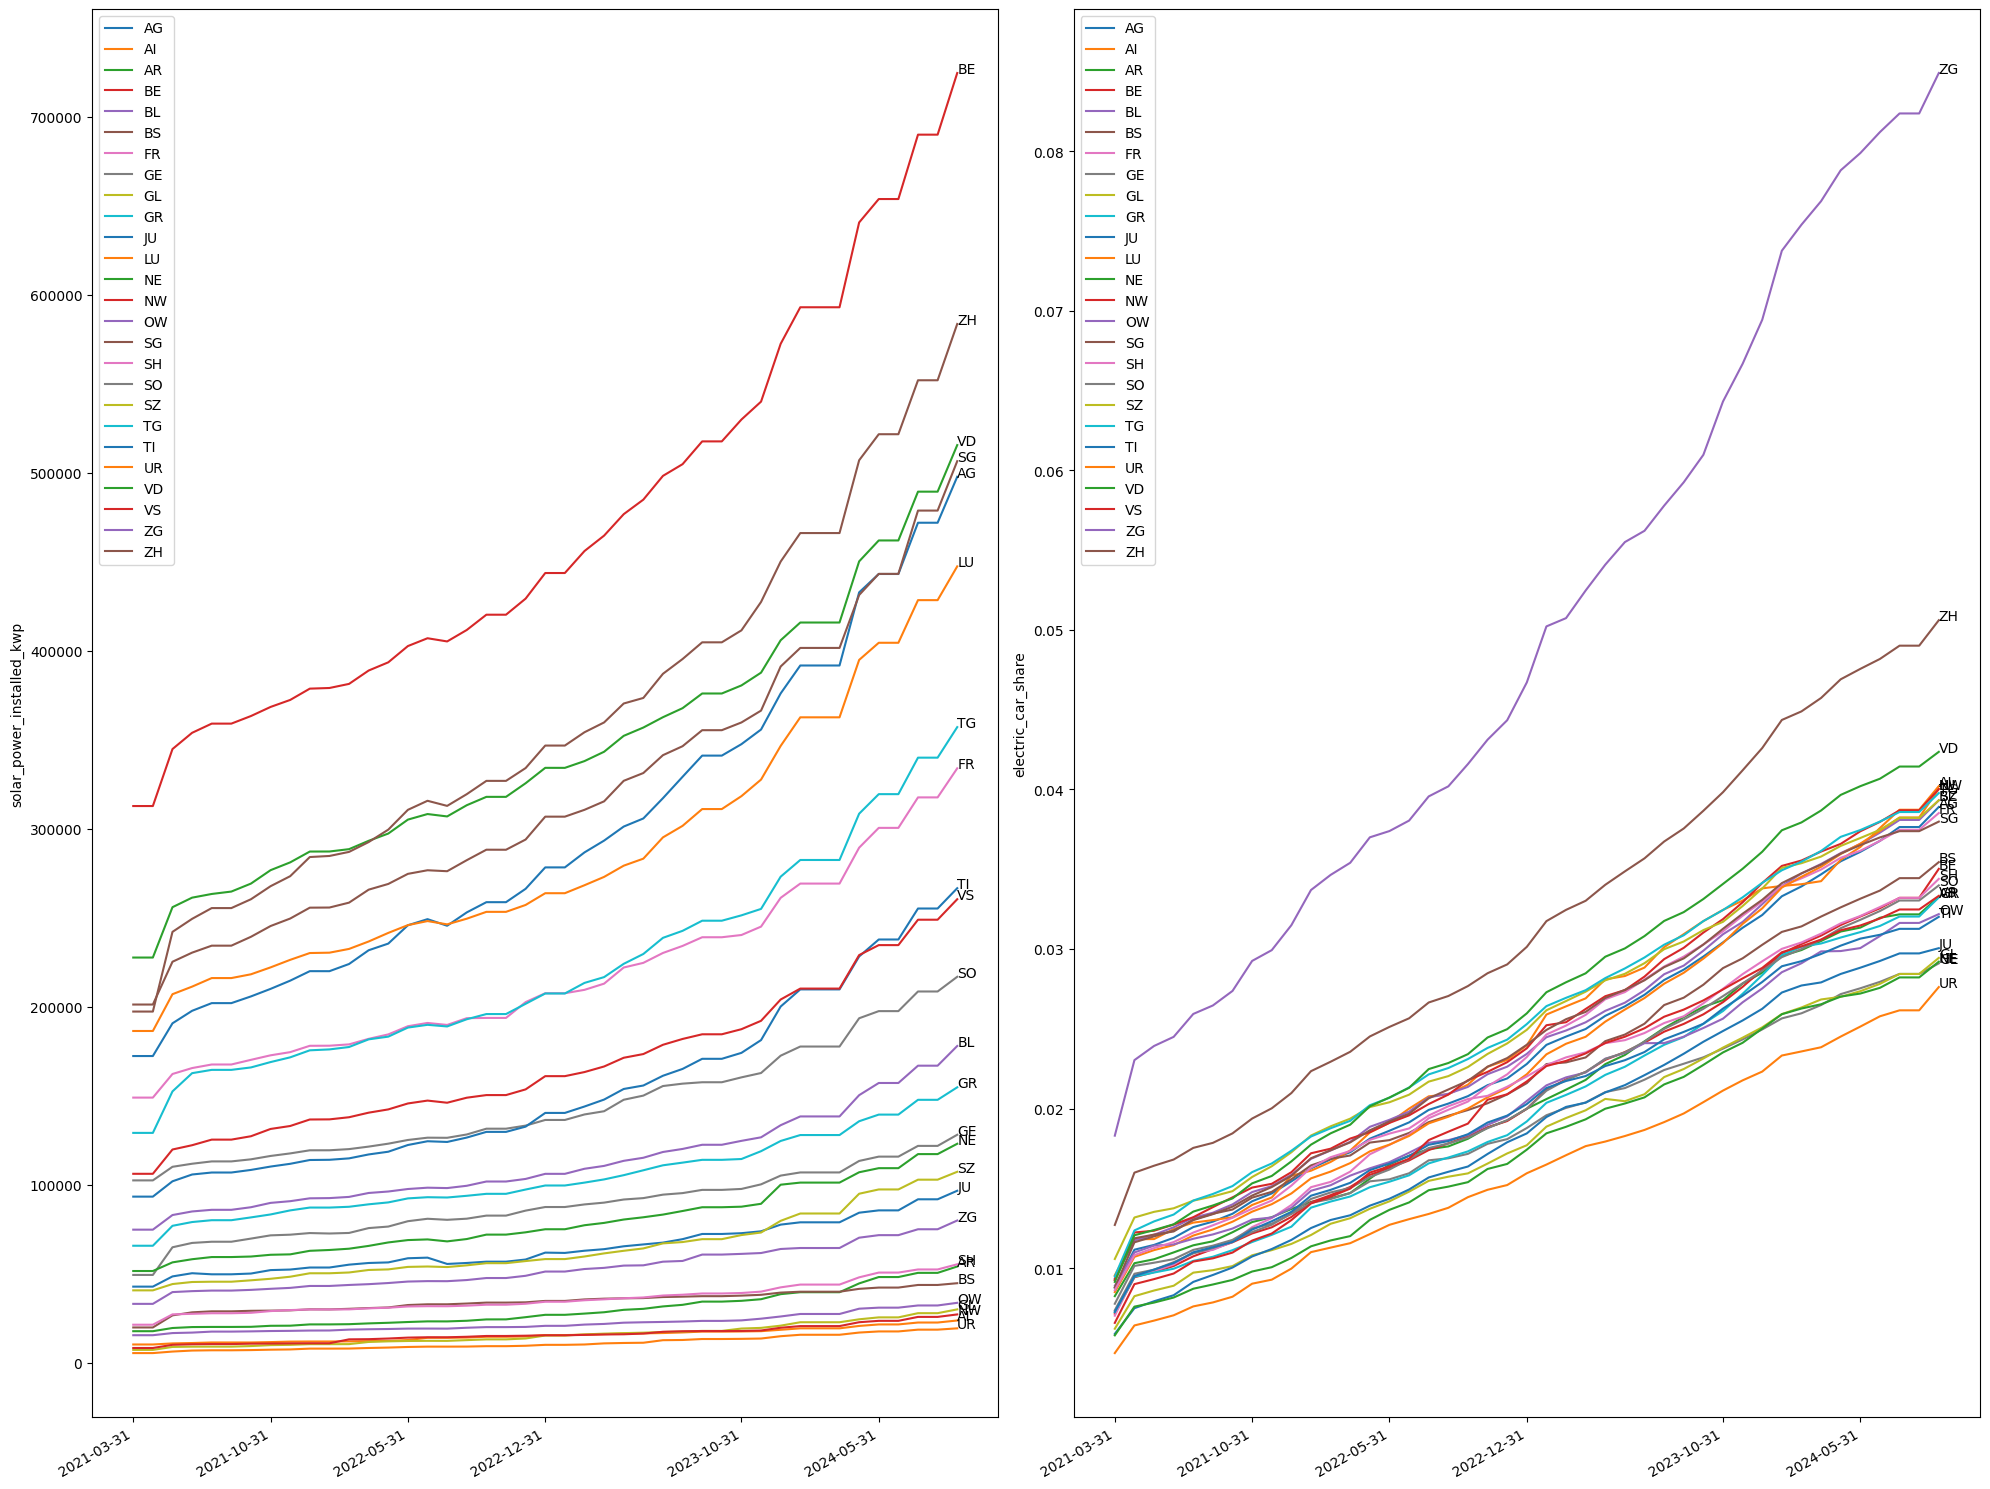

In [67]:
import matplotlib.dates as mdates

fig, plots = plt.subplots(1, len(features), figsize=(20, 15))

for feature_idx in range(len(features)):
    ax = plots[feature_idx]
    for canton_idx in range(len(cantons)):
        canton_name =cantons[canton_idx]
        cantonal_data = canton_sets[cantons[canton_idx]]
        ax.plot(cantonal_data[dates_column_name], cantonal_data[features[feature_idx]], label=canton_name)
        ax.set_ylabel(features[feature_idx])
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
        ax.annotate(canton_name, xy=(cantonal_data[dates_column_name].iloc[-1], cantonal_data[features[feature_idx]].iloc[-1]))

    ax.legend()



plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.tight_layout()
plt.show()      